# Import Libraries

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# Import Datasets

In [2]:
# F:/data_glacier_internship/week2/DataSets/

In [3]:
address = input("please enter the location where the datasets are stored(Don't inclue the dataset name and extension): ", )

please enter the location where the datasets are stored(Don't inclue the dataset name and extension): F:/data_glacier_internship/week2/DataSets/


In [4]:
cab_data = pd.read_csv(address+'Cab_Data.csv')
city = pd.read_csv(address+'City.csv')
customer_id = pd.read_csv(address+'Customer_ID.csv')
transaction_id = pd.read_csv(address+'Transaction_ID.csv')

# Understand and Pre-process Datasets

## Cab_Data:

In [5]:
#Print first 5 rows of cab_data dataset
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
#Let's look into the dimension of the dataset
cab_data.shape

(359392, 7)

Here, we can see that there are in total 359392 observations and 7 features available in the cab_data.

In [7]:
#cab_data dataset properties
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Here, Date of Travel is int64 type of data. However, it's always a good practice to have date in date and time format. Therefore, I would like to change the data type of Date of Travel from int64 to date and time.

In [8]:
cab_data['Date of Travel'].max()

43465

In [9]:
from datetime import datetime, timedelta

# assuming your int64 value is stored in a variable called "date_int"
date_int = 43465

# convert int64 to datetime using origin='2022-01-01'
date_date = datetime(1899, 12, 29) + timedelta(days=date_int)

# extract only the date from the datetime object
date_only = date_date.date()

#print the result
print(date_only)

2018-12-30


Since in the instruction, it was being mentioned that the data has been collected from 2016-01-31 till 2018-12-31, I first find out the minimum value from Date of Travel column (which is 42371) and choose the origin (1900, 1, 28) in a way so that 42371 converts to 2016-01-31.

However, in such settings, we will have 29 days of data on Janaury 2019. I think in the assignment instruction, they assign the start date from 2016-01-31 by mistake. The start date should be 2016-01-01 and not 2016-01-31. Because if we select (1899, 12, 29), it maps the lowest value 42371 to 2016-01-01 and the highest value 43465 to 2018-12-30. Therefore, even though the assignment asked us to consider 2016-01-31, I would still consider 2016-01-01 in order to have the completeness in my observations and analysis.

In [10]:
# convert int64 to datetime using origin='1900-01-28'
date=[]
for i in cab_data['Date of Travel']:
    date_datetime = datetime(1899, 12, 29) + timedelta(days= int(i))
    date_datetime = date_datetime.date()
    date.append(date_datetime)

#print the result. Here I choose 42371 to print.
print(date[2])

2016-01-01


In [11]:
#now replace the Date of Travel value with the converted values stored in date:
cab_data['Date of Travel'] = date

In [12]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
#basic descriptive statistics of cab_data
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [14]:
#Let's see if cab_data contains any null value:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

By looking at the output, we can clearly conclude that cab_data doesn't contain any null value. It's a good news for us.

Since we will be exploring our data in the upcoming sections, it's better to simplify a few features. In this case, I will choose the date column to split in months and years. So, that we can dig deeper into months as well as have a very high level look by choosing years only. We will have the freedom to do whatever analysis we would like to do with respect to time.

In [15]:
# Create two lists. One list contains the information of months and the other one contains years.
month = []
year = []

for i in range(0, len(cab_data['Date of Travel'])):
    month.append(cab_data['Date of Travel'][i].month)
    year.append(cab_data['Date of Travel'][i].year)
    
# Now let's create two new features in cab_data: month and year, and insert the newly created lists 
# into these features respectively
cab_data['month'] = month
cab_data['year'] = year

In [16]:
#Let's now look into our cab_data once again. But this time we will look into the last 5 observations
cab_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,year
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,2018
359391,10440107,2018-01-01,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,1,2018


I assume Price charged refers to the fair that the driver took from the passengers and Cost of Trip shows the actual cost of the trips. With that keeping in my mind, I would add a new column titled profit that would calculate the profit of each trip that is Price Charged - Cost of Trip.

In [17]:
#Calculate and store the profit from each trip
profit = []
for i,j in zip(cab_data['Price Charged'], cab_data['Cost of Trip']):
    pr = i - j
    profit.append(pr)
profit[0]

57.315

In [18]:
#Add the profit column into the cab_data dataset
cab_data['profit'] = profit

In [19]:
#Let's now look into our cab_data once again.
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,year,profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,23.666
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,27.568
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,25.798
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,16.844


In [20]:
#Let's not simplify it more but creating two sub datasets with respect to Company field.

yellow_cab = cab_data[cab_data['Company']=='Yellow Cab']
pink_cab = cab_data[cab_data['Company']=='Pink Cab']

In [21]:
#let's see if two sub datasets look good:
yellow_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,year,profit
233,10000384,2016-01-01,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,1,2016,877.0076
234,10000385,2016-01-08,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,1,2016,895.7768
235,10000386,2016-01-02,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,1,2016,232.3320
236,10000387,2016-01-05,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,1,2016,504.1600
237,10000388,2016-01-06,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,1,2016,944.1908


In [22]:
#let's see if two sub datasets look good:
pink_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,year,profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,23.666
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,27.568
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,25.798
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,16.844


## City:

In [23]:
#Print first 5 rows of city dataset
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [24]:
#Let's look into the dimension of the dataset
city.shape

(20, 3)

Here, we can see that there are in total 20 observations and 3 features available in the city dataset.

In [25]:
#city dataset properties
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [26]:
#Let's see if city contains any null value:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

By looking at the output, we can clearly conclude that city doesn't contain any null value. It's a good news for us.

In [27]:
#basic descriptive statistics of city
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,WASHINGTON DC,"943,999","5,712"
freq,1,1,1


## customer_id

In [28]:
#Print first 5 rows of city dataset
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [29]:
#Let's look into the dimension of the dataset
customer_id.shape

(49171, 4)

Here, we can see that there are in total 49171 observations and 4 features available in the customer_id dataset.

In [30]:
#city dataset properties
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [31]:
#Let's see if customer_id contains any null value:
customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

By looking at the output, we can clearly conclude that customer_id doesn't contain any null value. It's a good news for us.

In [32]:
#basic descriptive statistics of customer_id
customer_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


## transaction_id

In [33]:
#Print first 5 rows of transaction_id dataset
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [34]:
#Let's look into the dimension of the dataset
transaction_id.shape

(440098, 3)

Here, we can see that there are in total 440098 observations and 3 features available in the transaction_id dataset.

In [35]:
#transaction_id dataset properties
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [36]:
#Let's see if transaction_id contains any null value:
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

By looking at the output, we can clearly conclude that transaction_id doesn't contain any null value. It's a good news for us.

In [37]:
#basic descriptive statistics of transaction_id
transaction_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


# Analysis and Visualization

### Let's analyze and visualize yellow_cab and pink_cab datasets first:

In [38]:
yellow_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,year,profit
233,10000384,2016-01-01,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,1,2016,877.0076
234,10000385,2016-01-08,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,1,2016,895.7768
235,10000386,2016-01-02,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,1,2016,232.3320
236,10000387,2016-01-05,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,1,2016,504.1600
237,10000388,2016-01-06,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,1,2016,944.1908


In [39]:
# Let's look into the profit the yellow cab made in each month and visualize it as a bar graph:
yellow_profit_month = yellow_cab.groupby(['year', 'month']).profit.sum()

In [40]:
# yellow_profit_month

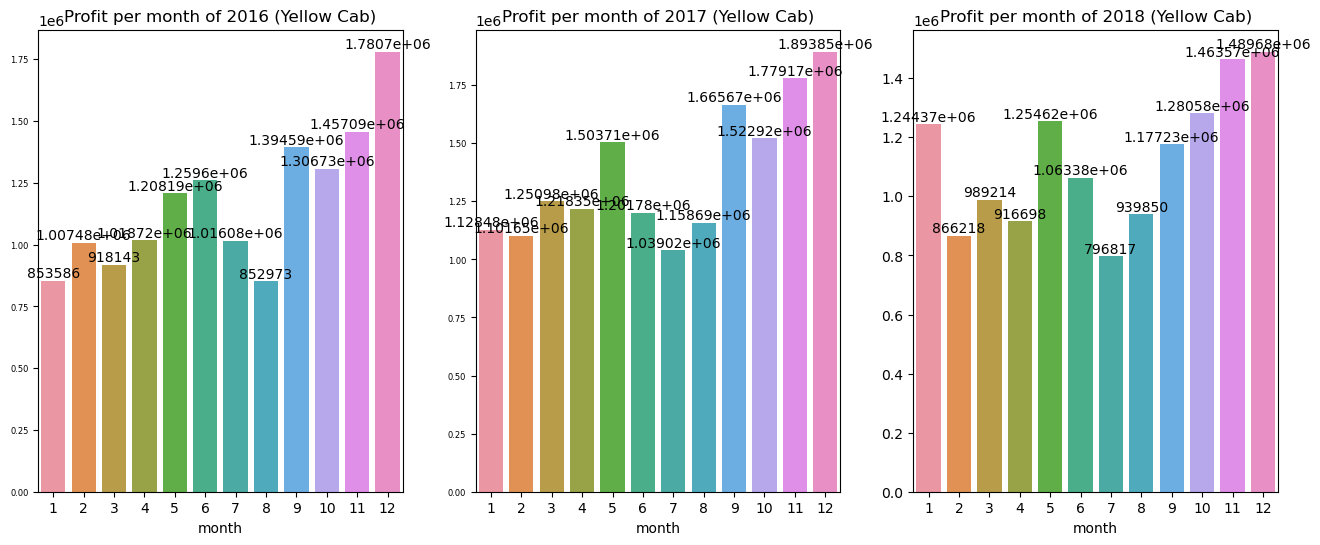

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# First plot
sns.barplot(x=yellow_profit_month[2016].index, y=yellow_profit_month[2016].values, ax=axs[0])
axs[0].set_title('Profit per month of 2016 (Yellow Cab)')
axs[0].tick_params(axis='y', which='both', labelsize=6, labelrotation=0)
for i in axs[0].containers:
    axs[0].bar_label(i,label_type='edge')

# Second plot
sns.barplot(x=yellow_profit_month[2017].index, y=yellow_profit_month[2017].values, ax=axs[1])
axs[1].set_title('Profit per month of 2017 (Yellow Cab)')
axs[1].tick_params(axis='y', which='both', labelsize=6, labelrotation=0)
for i in axs[1].containers:
    axs[1].bar_label(i,label_type='edge')

# Third plot
sns.barplot(x=yellow_profit_month[2018].index, y=yellow_profit_month[2018].values, ax=axs[2])
axs[2].set_title('Profit per month of 2018 (Yellow Cab)')
for i in axs[2].containers:
    axs[2].bar_label(i,label_type='edge')
    
plt.show()

After data of each month per year, we observe that Yellow Cab made the most profit during the month of December and then November.

In [42]:
# Now let's see in which year Yellow cab made the most profit:
yellow_profit_year = yellow_cab.groupby(['year']).profit.sum()
# yellow_profit_year

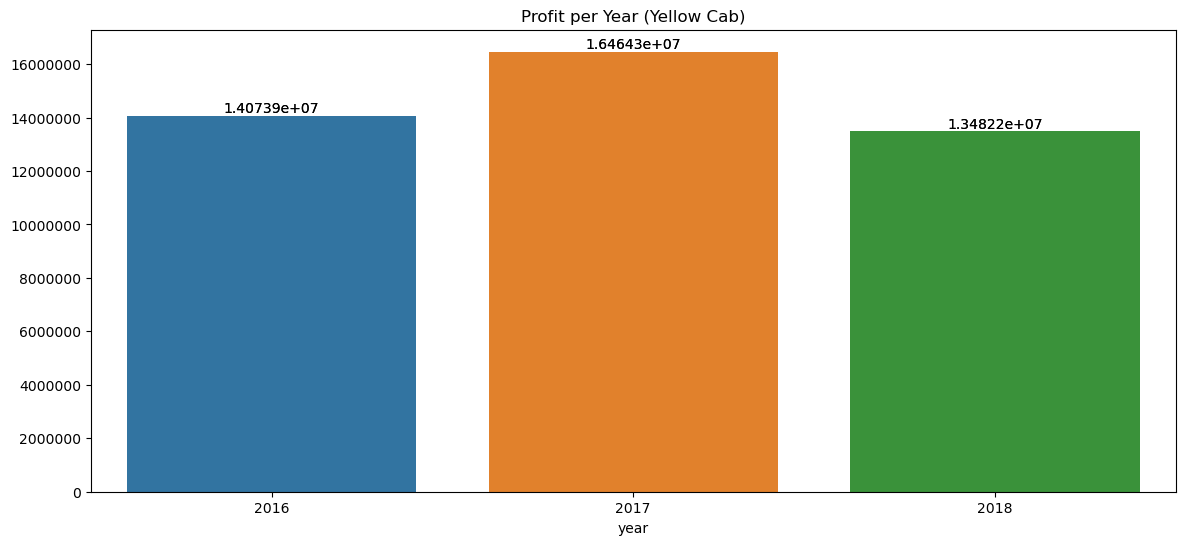

In [43]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=yellow_profit_year.index,y=yellow_profit_year.values)
sns.barplot(x=yellow_profit_year.index,y= yellow_profit_year.values)
plt.title('Profit per Year (Yellow Cab)')
plt.ticklabel_format(style='plain', axis='y')

for i in ax.containers:
    ax.bar_label(i,label_type='edge')
plt.show()

We observe that on 2017, Yellow cab made the most profile (1.64643e+07). On 2016 they made slightly better profit than 2018.

In [44]:
yellow_cab_km_travelled = yellow_cab.groupby(['year','month'])['KM Travelled'].sum()

In [45]:
# yellow_cab_km_travelled[2017]

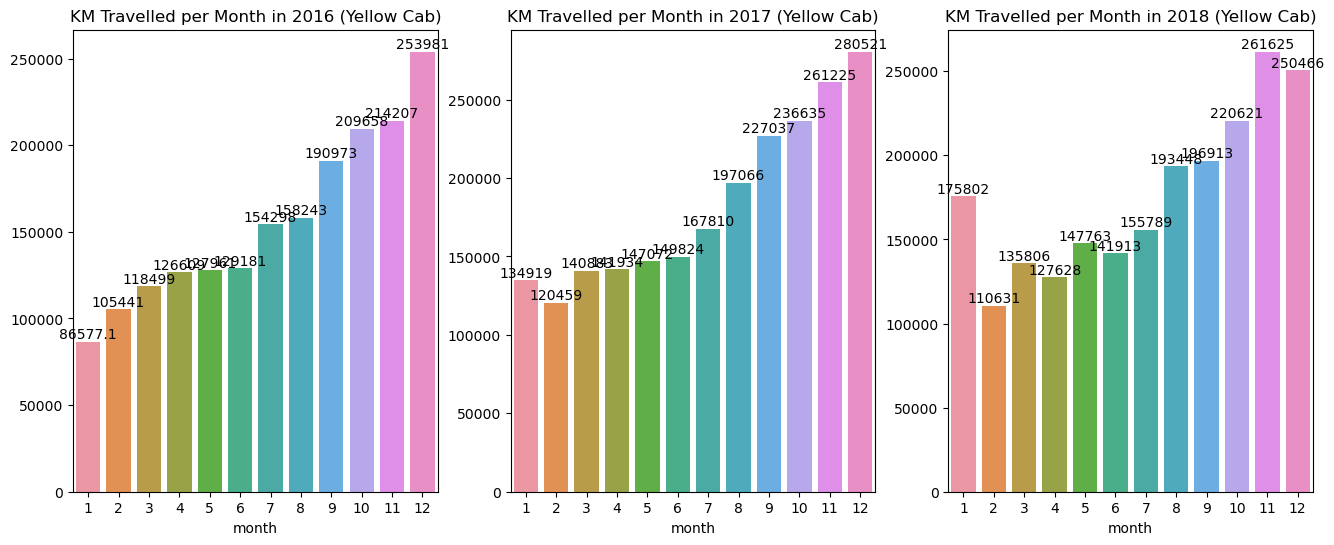

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# First plot
sns.barplot(x=yellow_cab_km_travelled[2016].index, y=yellow_cab_km_travelled[2016].values, ax=axs[0])
axs[0].set_title('KM Travelled per Month in 2016 (Yellow Cab)')
for i in axs[0].containers:
    axs[0].bar_label(i,label_type='edge')

# Second plot
sns.barplot(x=yellow_cab_km_travelled[2017].index, y=yellow_cab_km_travelled[2017].values, ax=axs[1])
axs[1].set_title('KM Travelled per Month in 2017 (Yellow Cab)')
for i in axs[1].containers:
    axs[1].bar_label(i,label_type='edge')

# Third plot
sns.barplot(x=yellow_cab_km_travelled[2018].index, y=yellow_cab_km_travelled[2018].values, ax=axs[2])
axs[2].set_title('KM Travelled per Month in 2018 (Yellow Cab)')
for i in axs[2].containers:
    axs[2].bar_label(i,label_type='edge')
plt.show()

In every year, Yellow Cab travelled the most in the month of December with just one exception, in 2018 November was the highest travelled month.

In [47]:
yellow_city = yellow_cab.groupby(['City']).size()

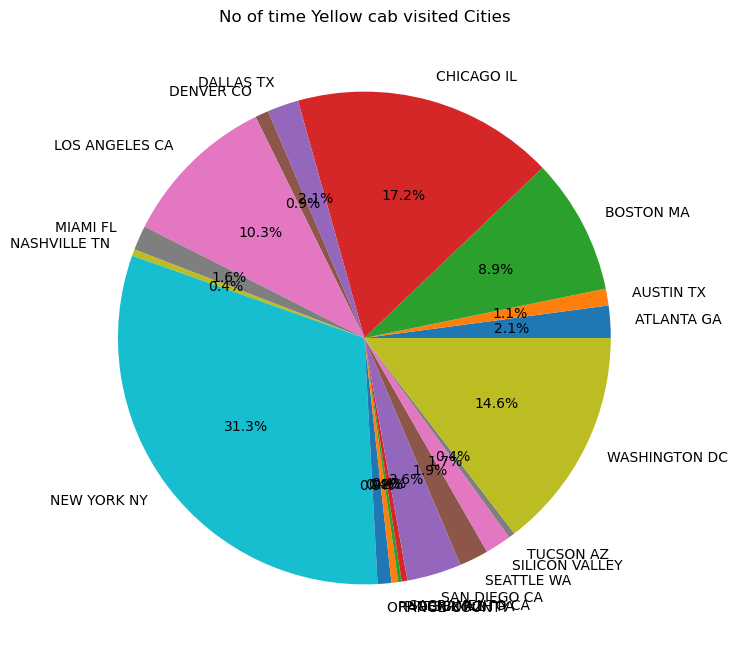

In [48]:
# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(yellow_city.values, labels=yellow_city.index, autopct='%1.1f%%')
plt.title('No of time Yellow cab visited Cities')
plt.show()

If we consider the data of the three years (2016-18), we see that New York is the most visited city by Yellow Cab, about 31.3% of the total visit. The second highest visit city is Chicago, about 17.2%. Even though Chicago stands second, the total visit to Chicago is almost the half of the total visit to NY.

Let's see if the features within the dataset are correlated or not:

In [49]:
yellow_cab['KM Travelled'].corr(yellow_cab['profit']) #positively correlated

0.5031522082950742

Both the distance and the profit are positively correlated. It means longer the distance is, the more the profit will be. 

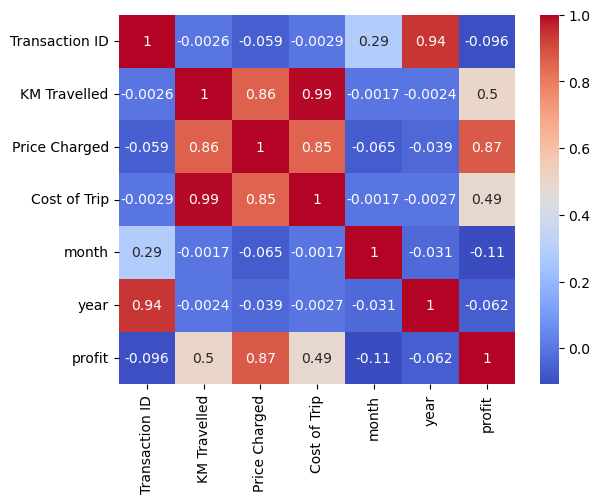

In [71]:
# calculate the correlation matrix
corr = yellow_cab.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

###  pink_cab dataset:

Let's now do the similar analysis to see if Pink Cab shows any different pattern or not

In [50]:
pink_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,year,profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,23.666
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,27.568
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,25.798
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,16.844


In [51]:
# Let's look into the profit the pink cab made in each month and visualize it as a bar graph:
pink_profit_month = pink_cab.groupby(['year', 'month']).profit.sum()

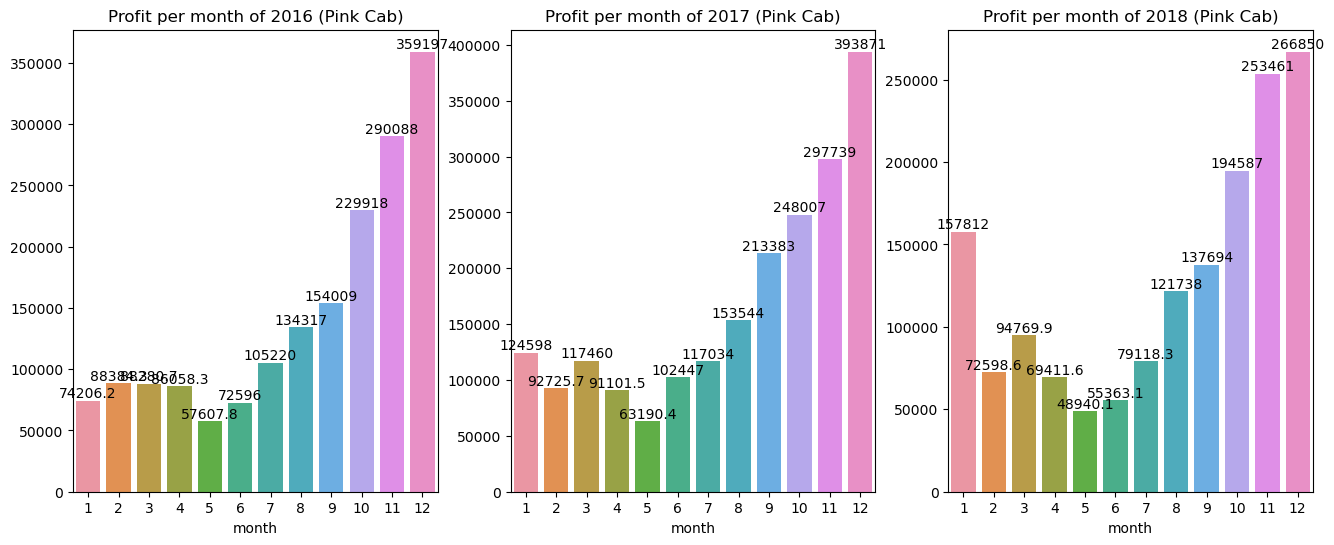

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# First plot
sns.barplot(x=pink_profit_month[2016].index, y=pink_profit_month[2016].values, ax=axs[0])
axs[0].set_title('Profit per month of 2016 (Pink Cab)')
for i in axs[0].containers:
    axs[0].bar_label(i,label_type='edge')

# Second plot
sns.barplot(x=pink_profit_month[2017].index, y=pink_profit_month[2017].values, ax=axs[1])
axs[1].set_title('Profit per month of 2017 (Pink Cab)')
for i in axs[1].containers:
    axs[1].bar_label(i,label_type='edge')

# Third plot
sns.barplot(x=pink_profit_month[2018].index, y=pink_profit_month[2018].values, ax=axs[2])
axs[2].set_title('Profit per month of 2018 (Pink Cab)')
for i in axs[2].containers:
    axs[2].bar_label(i,label_type='edge')
plt.show()


Even though pink cab also made the maximum profit during November ane December in each year, if we compare the profit with respect to the yellow cab, then pink cab made a very low profit. It seems like yellow cab is more popular than pink cab.

In [53]:
# Now let's see in which year Pink cab made the most profit:
pink_profit_year = pink_cab.groupby(['year']).profit.sum()

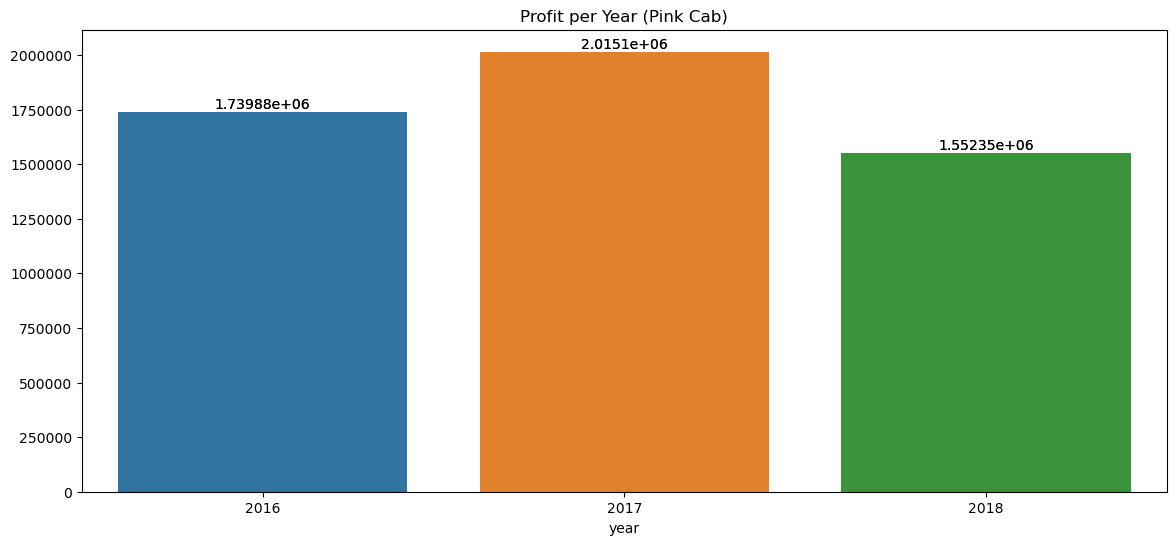

In [54]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=pink_profit_year.index,y=pink_profit_year.values)
sns.barplot(x=pink_profit_year.index,y= pink_profit_year.values)
plt.title('Profit per Year (Pink Cab)')
plt.ticklabel_format(style='plain', axis='y')

for i in ax.containers:
    ax.bar_label(i,label_type='edge')
plt.show()

For pink cab, the profit fashion is exactly the same as yellow cab. The highest profit made on 2017, and on 2016 they made a slightly better profit than 2018. It seems like 2018 was a good year for cab business.

In [55]:
pink_cab_km_travelled = pink_cab.groupby(['year','month'])['KM Travelled'].sum()

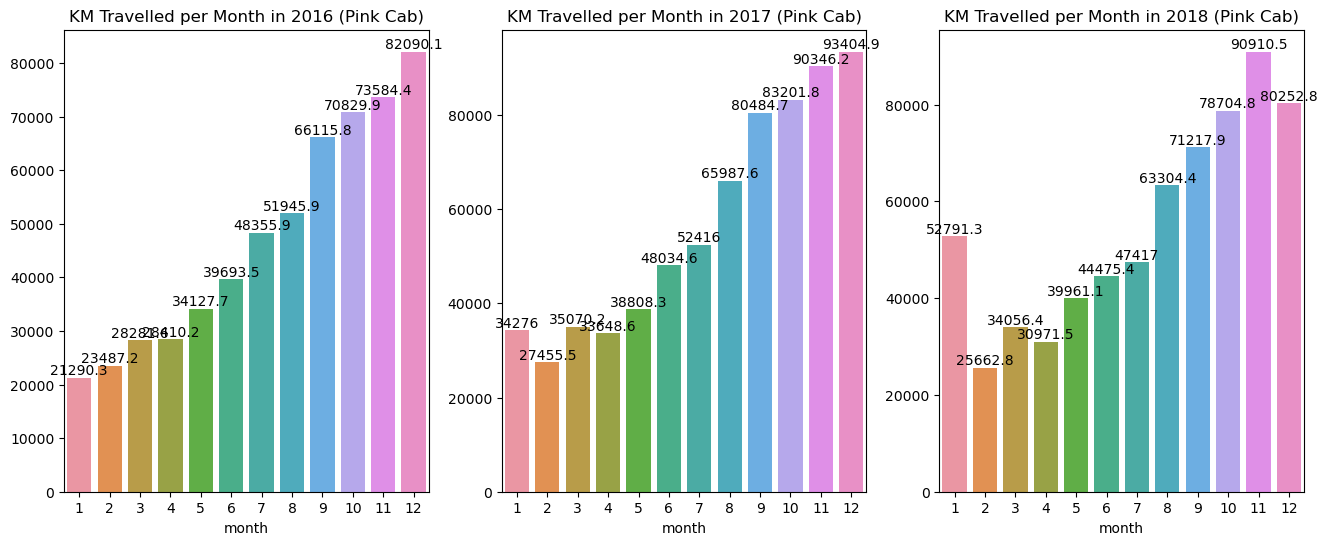

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

#First plot
sns.barplot(x=pink_cab_km_travelled[2016].index, y=pink_cab_km_travelled[2016].values, ax=axs[0])
axs[0].set_title('KM Travelled per Month in 2016 (Pink Cab)')
for i in axs[0].containers:
    axs[0].bar_label(i,label_type='edge')

#Second plot
sns.barplot(x=pink_cab_km_travelled[2017].index, y=pink_cab_km_travelled[2017].values, ax=axs[1])
axs[1].set_title('KM Travelled per Month in 2017 (Pink Cab)')
for i in axs[1].containers:
    axs[1].bar_label(i,label_type='edge')

#Third plot
sns.barplot(x=pink_cab_km_travelled[2018].index, y=pink_cab_km_travelled[2018].values, ax=axs[2])
axs[2].set_title('KM Travelled per Month in 2018 (Pink Cab)')
for i in axs[2].containers:
    axs[2].bar_label(i,label_type='edge')

plt.show()

It is quite obvious that the pattern that the pink cab shows for covering distances with respect to each month of the three years will be similar to the yellow cab since we already saw the profit patterns were quite similar.

In [57]:
pink_city = pink_cab.groupby(['City']).size()

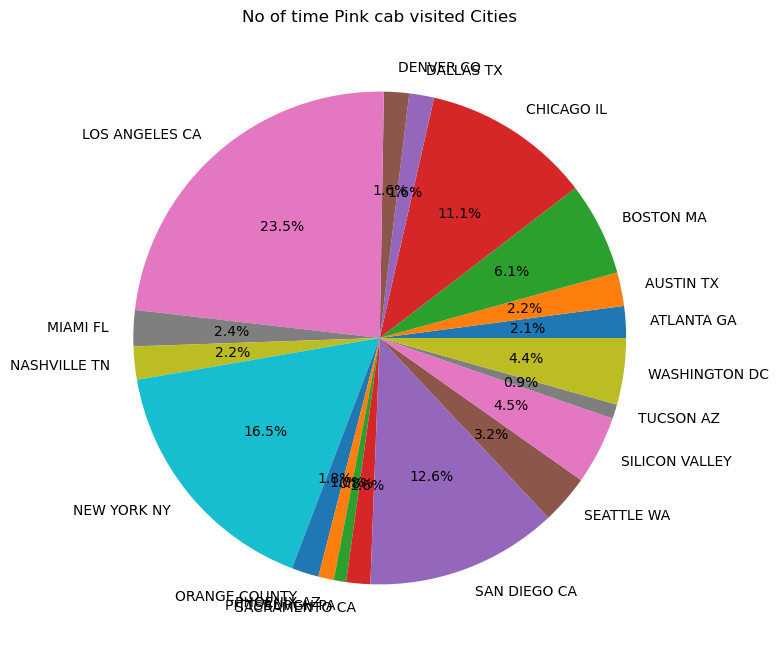

In [58]:
# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(pink_city.values, labels=pink_city.index, autopct='%1.1f%%')
plt.title('No of time Pink cab visited Cities')
plt.show()

If we consider the data of the three years (2016-18), we see that Los Angeles is the most visited city by Pink Cab, about 23.5% of the total visit. However, if we compare this data with the yellow cab, then the visit is much lower than the yellow cab visit (New York, 31.5%). The second highest visit city is San Diego, about 12.6%. For yellow cab it was Chicago. This figures also describe that pink cab is less popular than yellow cab.

Let's see if we can find the outliers in the Price charged column of both yellow and pink cab.

In [60]:
pink_cab['KM Travelled'].corr(pink_cab['profit']) 

0.4426325004808459

For Pink cab, the situation is similar that is both the distance and the profit are positively correlated but the correlation is weaker than yellow cab. It means the pink cab were not able to draw as much profit as the yellow cab.

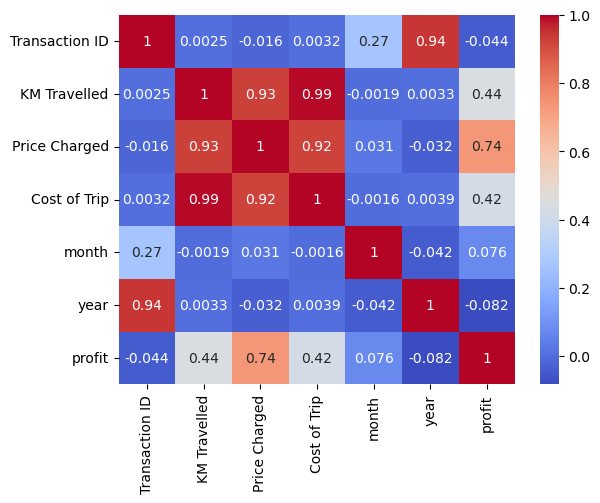

In [72]:
# calculate the correlation matrix
corr = pink_cab.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Pink Cab')

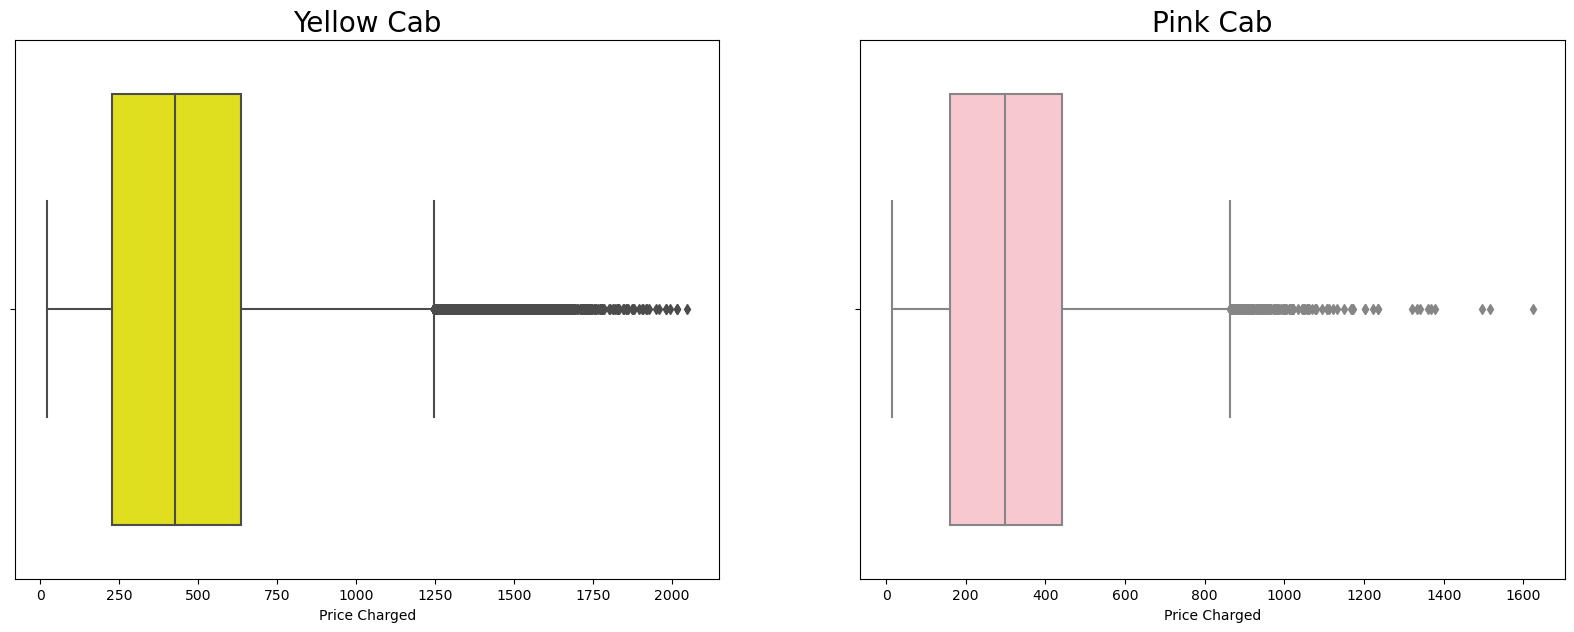

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(data=yellow_cab, x='Price Charged', color='yellow', ax=ax1)
ax1.set_title('Yellow Cab', fontsize=20)
sns.boxplot(data=pink_cab, x='Price Charged', color='pink', ax=ax2)
ax2.set_title('Pink Cab', fontsize=20)


Even though we see outliers in both of the box plotes, I decided to keep it because it would give us the broader image of the company that charges more money than the other. For example, here we clearly see that the overall price charged by the yellow cab is higher than the pink cab.

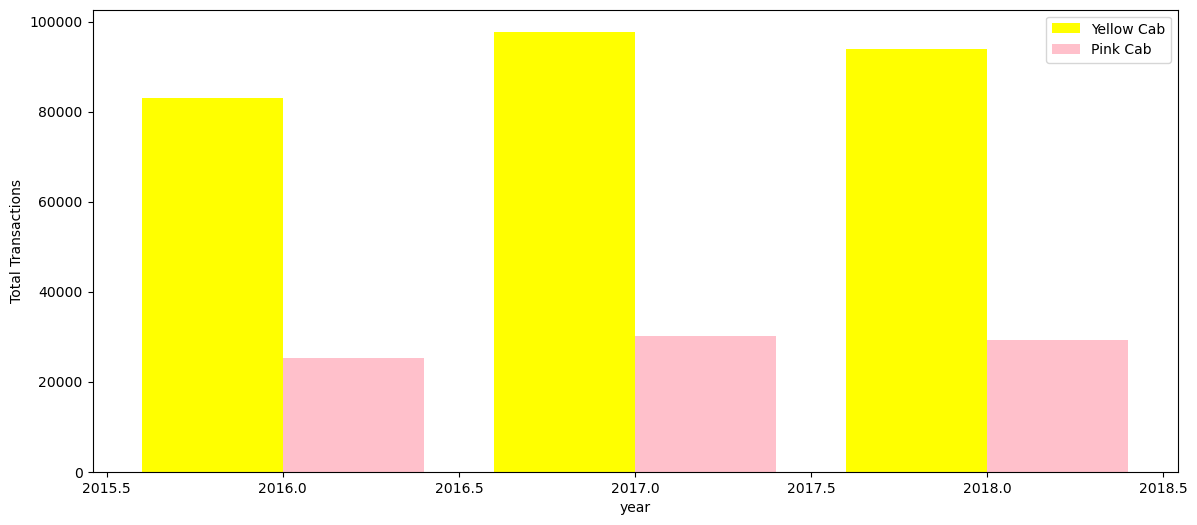

In [65]:
fig, ax = plt.subplots(figsize=(14, 6))

yellow_count = yellow_cab.groupby('year')['Transaction ID'].count()
pink_count = pink_cab.groupby('year')['Transaction ID'].count()

ax.bar(yellow_count.index-0.2, yellow_count.values, width=0.4, color='yellow', align='center', label='Yellow Cab')
ax.bar(pink_count.index+0.2, pink_count.values, width=0.4, color='pink', align='center', label='Pink Cab')

ax.set_ylabel('Total Transactions')
ax.set_xlabel('year')
ax.legend()
plt.show()

With the plot, we can confidently conclude that in each year, the total transactions of the yellow cab is approximately three times more than the pink cab. The yellow cab is definitely doing good business in the market.

## Let's look into city dataset now:

In [76]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [87]:
city["Population"] = city["Population"].str.replace(",","").astype(float)
city["Users"] = city["Users"].str.replace(",","").astype(float)
percent_users = []
for i in range(0, len(city)):
    row = city.iloc[i]
    row[2] = pd.to_numeric(row[2])
    row[1] = pd.to_numeric(row[1])
    pu = (row[2] / row[1]) * 100
    percent_users.append(pu)
city['percent_users'] = percent_users
city.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,City,Population,Users,percent_users
0,NEW YORK NY,8405837.0,302149.0,3.594514
1,CHICAGO IL,1955130.0,164468.0,8.412126
2,LOS ANGELES CA,1595037.0,144132.0,9.036279
3,MIAMI FL,1339155.0,17675.0,1.319862
4,SILICON VALLEY,1177609.0,27247.0,2.313756


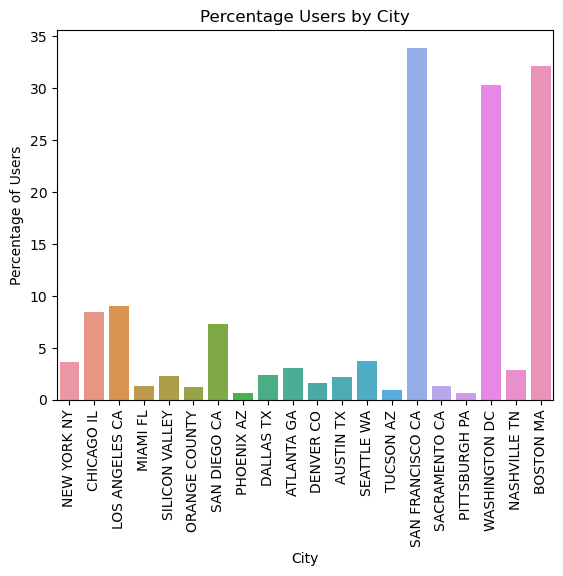

In [92]:
# create the bar plot
sns.barplot(x="City", y="percent_users", data=city)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Percentage of Users')
plt.title('Percentage Users by City')

plt.show()

Here, we can see that among others San Francisco, Washington, and Boston holds the highest percentage of the total users respectively.

## Let's look into customer_id dataset now:

In [93]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [96]:
customer_gender = customer_id.groupby(['Gender']).size()

In [97]:
customer_gender

Gender
Female    22609
Male      26562
dtype: int64

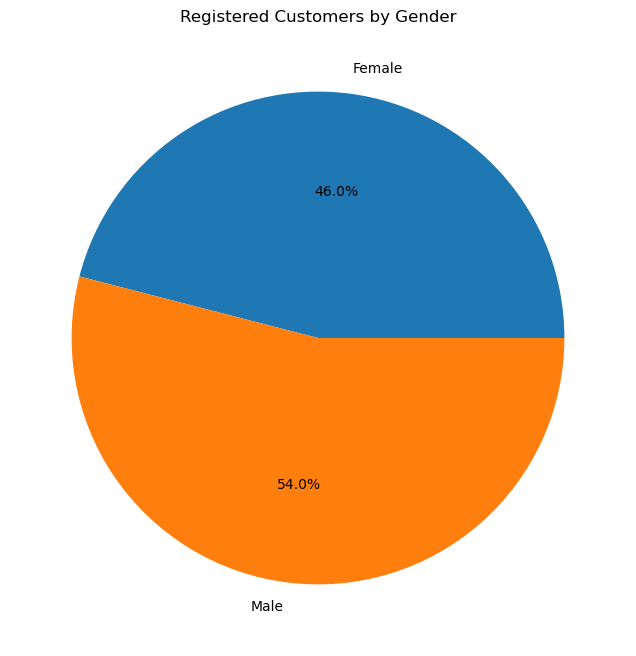

In [100]:
# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(customer_gender.values, labels=customer_gender.index, autopct='%1.1f%%')
plt.title('Registered Customers by Gender')
plt.show()

Among all the customers, 54% is male and 46% is female.

In [106]:
customer_age = customer_id.groupby(['Age'])['Age'].count()

In [117]:
# customer_age

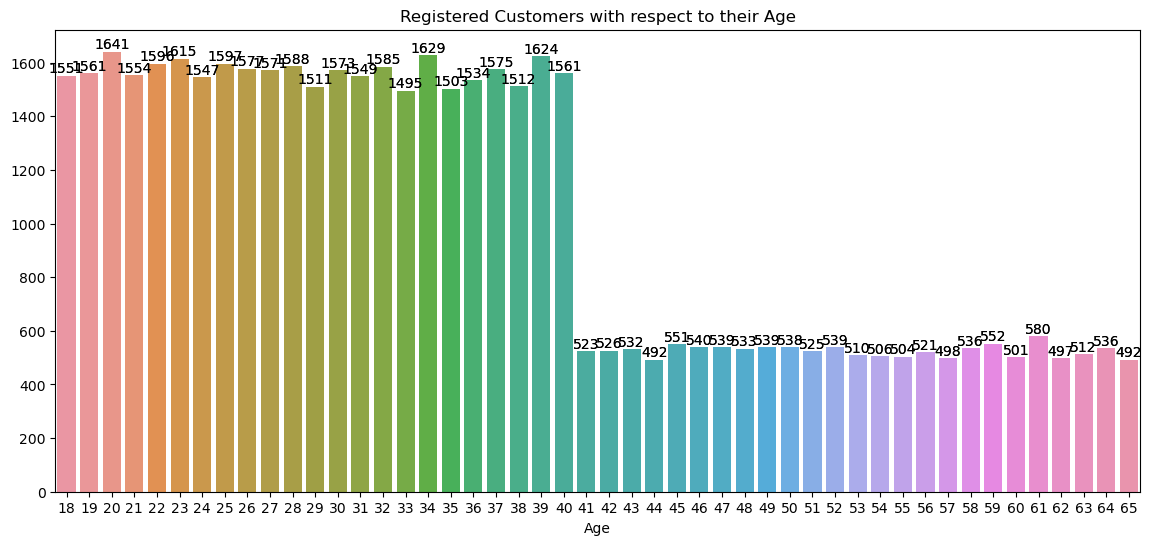

In [116]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=customer_age.index,y=customer_age.values)
sns.barplot(x=customer_age.index,y= customer_age.values)
plt.title('Registered Customers with respect to their Age')
plt.ticklabel_format(style='plain', axis='y')

for i in ax.containers:
    ax.bar_label(i,label_type='edge')
plt.show()

By looking into this plot, it is clear that the service of thes cab companies are more popular to the people who are within the age range of 18-40 than people from the age range of 41-65. The number of registered customers from 18-40 group is approximately 3 times higher than the older group.

## Let's look into transaction_id dataset now:

In [118]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [119]:
payment_pref = transaction_id.groupby(['Payment_Mode']).size()

In [120]:
payment_pref

Payment_Mode
Card    263991
Cash    176107
dtype: int64

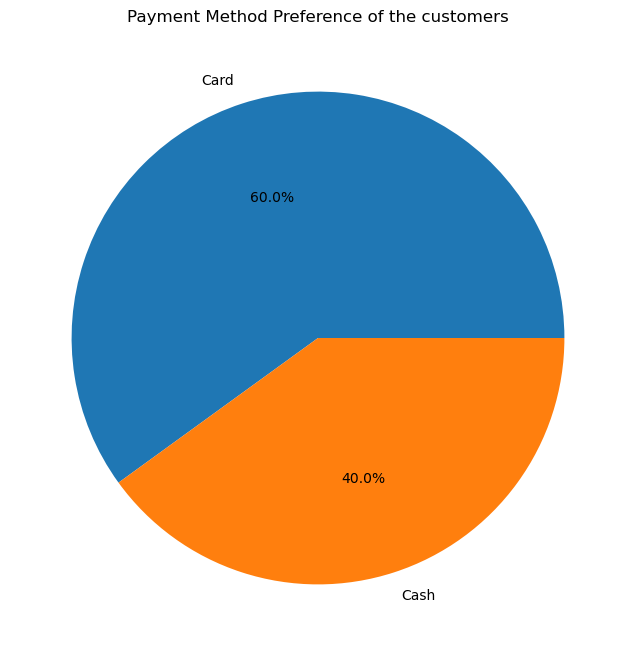

In [122]:
# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(payment_pref.values, labels=payment_pref.index, autopct='%1.1f%%')
plt.title('Payment Method Preference of the customers')
plt.show()

The data says that customers prefer to pay with card more than with cash. This data shows how cards are getting popular among users and the use of cash is getting lower.

# Merge two datasets: customer_id, and transaction_id

In [124]:
merged_customer_data = pd.merge(customer_id, transaction_id, on='Customer ID', how='inner')

In [125]:
merged_customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [129]:
payment_age = merged_customer_data.groupby(['Payment_Mode', 'Age'])['Payment_Mode'].count()

In [130]:
payment_age

Payment_Mode  Age
Card          18     8209
              19     8335
              20     9050
              21     8153
              22     8710
                     ... 
Cash          61     2091
              62     1749
              63     1798
              64     1923
              65     1649
Name: Payment_Mode, Length: 96, dtype: int64

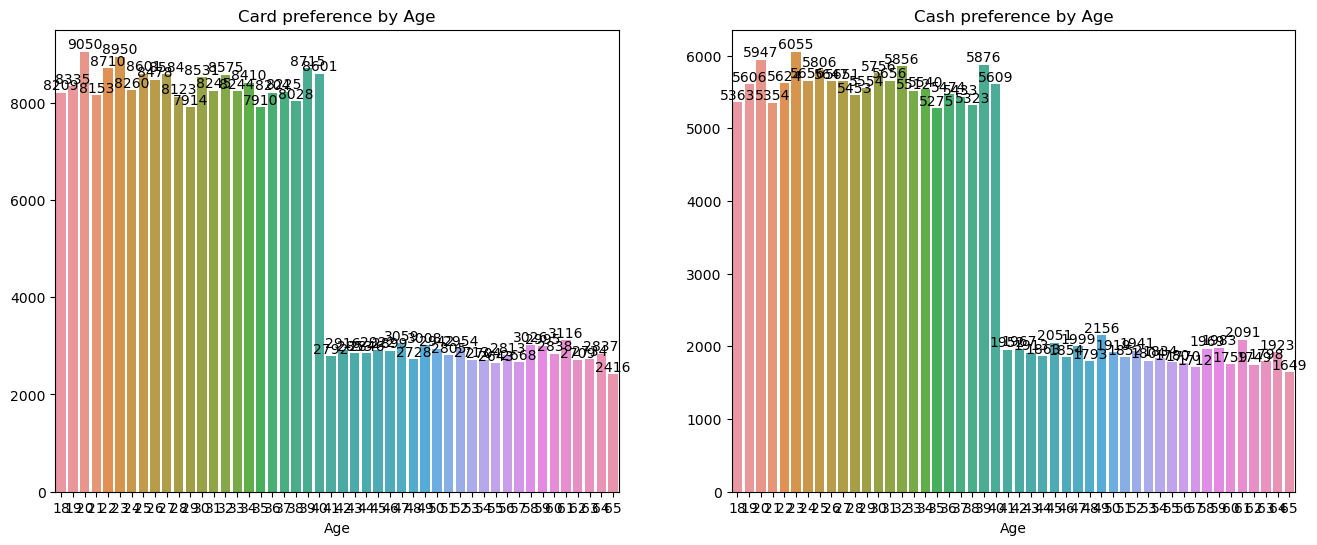

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

#First plot
sns.barplot(x=payment_age['Card'].index, y=payment_age['Card'].values, ax=axs[0])
axs[0].set_title('Card preference by Age')
for i in axs[0].containers:
    axs[0].bar_label(i,label_type='edge')

#Second plot
sns.barplot(x=payment_age['Cash'].index, y=payment_age['Cash'].values, ax=axs[1])
axs[1].set_title('Cash preference by Age')
for i in axs[1].containers:
    axs[1].bar_label(i,label_type='edge')
plt.show()



Even though before conducting this analysis, I thought older people (41-65) will prefer to pay with cash more than the young group (18-40) but after visualizing the data, it seems like in both of the payment situation young group dominates. Yes, it needs not to mention that since the participation from this young group is significantly higher than the old group, their dominance is relatively much higher than the old group.

In [134]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,year,profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,23.666
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,27.568
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,25.798
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,16.844


# Merge merged_customer_data (customer_id + transaction_di) with cab_data:

In [135]:
merged_customer_data_cab = pd.merge(cab_data, merged_customer_data, on='Transaction ID', how='inner')

In [136]:
merged_customer_data_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,year,profit,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,57.315,29290,Male,28,10813,Card
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,23.666,27703,Male,27,9237,Card
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,27.568,28712,Male,53,11242,Cash
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,25.798,28020,Male,23,23327,Cash
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,16.844,27182,Male,33,8536,Card


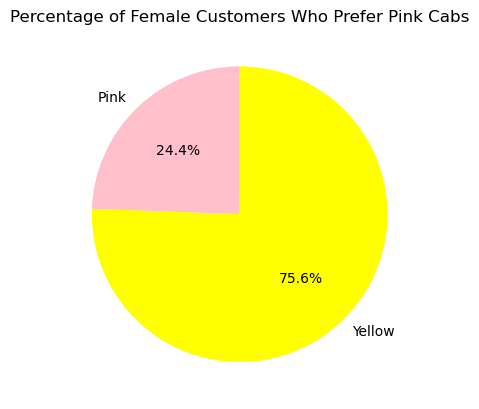

In [149]:
# Create dataframe with only female customers
females = merged_customer_data_cab[merged_customer_data_cab['Gender'] == 'Female']

# Count the number of females who prefer Pink cabs
pink_count = len(females[females['Company'] == 'Pink Cab'])

# Count the total number of female customers
total_count = len(females)

# Calculate the percentage of females who prefer Pink cabs
pink_percent = pink_count / total_count * 100

# Create the pie chart
labels = ['Pink', 'Yellow']
sizes = [pink_percent, 100-pink_percent]
colors = ['pink', 'yellow']

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Female Customers Who Prefer Pink Cabs')
plt.show()

Even though I have a prior assumption that females would prefer Pink the most but out of all females only 24.4% females preferred Pink Company.

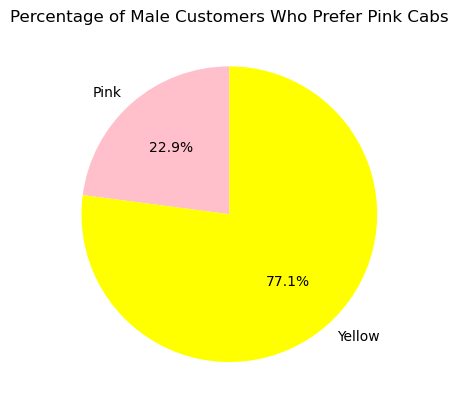

In [150]:
# Create dataframe with only female customers
males = merged_customer_data_cab[merged_customer_data_cab['Gender'] == 'Male']

# Count the number of females who prefer Pink cabs
pink_count = len(males[males['Company'] == 'Pink Cab'])

# Count the total number of female customers
total_count = len(males)

# Calculate the percentage of females who prefer Pink cabs
pink_percent = pink_count / total_count * 100

# Create the pie chart
labels = ['Pink', 'Yellow']
sizes = [pink_percent, 100-pink_percent]
colors = ['pink', 'yellow']

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Male Customers Who Prefer Pink Cabs')
plt.show()

The service the males took from the yellow cab is significantly higher thank the pink cab.

# MASTER DATA

In [154]:
master_data = pd.merge(merged_customer_data_cab, city, on='City', how='inner')

In [157]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,year,profit,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,percent_users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,57.315,29290,Male,28,10813,Card,814885.0,24701.0,3.031225
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,23.666,27703,Male,27,9237,Card,814885.0,24701.0,3.031225
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,27.568,28712,Male,53,11242,Cash,814885.0,24701.0,3.031225
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,25.798,28020,Male,23,23327,Cash,814885.0,24701.0,3.031225
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,16.844,27182,Male,33,8536,Card,814885.0,24701.0,3.031225


Let's check and remove duplicate and null values from the master_data

In [158]:
# Check for duplicate rows
print("Duplicate rows:", master_data.duplicated().sum())

# Check for null values
print("Null values:", master_data.isnull().sum())

# Remove duplicate rows
master_data = master_data.drop_duplicates()

# Remove rows with null values
master_data = master_data.dropna()

# Verify that duplicate and null values have been removed
print("Duplicate rows:", master_data.duplicated().sum())
print("Null values:", master_data.isnull().sum())

Duplicate rows: 0
Null values: Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
month                 0
year                  0
profit                0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
Population            0
Users                 0
percent_users         0
dtype: int64
Duplicate rows: 0
Null values: Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
month                 0
year                  0
profit                0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
Population            0
Users                 0
percent_users         0
dtype: int64


After conducting a research on the given datasets, here are a few data-driven observations that would definitely allow XYZ to make the right decision:
- The Yellow Cab makes significantly good profit than the Pink Cab.
- The Yellow Cab has much bigger customer base than the Pink Cab.
- Even though the Yellow Cab charges more money since they have a good impression, people still prefer to take the Yellow Cab services.
- After analyzing the data, we know that the Yellow Cab will go bigger in the upcoming years.

In conclusion, I would recommend to invest on the Yellow Cab since it would be much more safer and meaningful than investing on the Pink Cab.